### Importación de Tensorflow

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### Importación de datos

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data( )

### Verificando los datos de prueba

In [4]:
y_train.shape

(60000,)

In [5]:
x_train.shape

(60000, 28, 28)

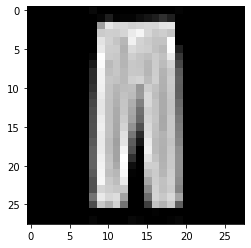

In [6]:
imagendemo = x_train[21]
plt.imshow(imagendemo, cmap = 'gray')

In [0]:
def image_matrix(img):
    print('\n'.join([''.join(['{:4}'.format(int(round(item * 255))) for item in row]) 
      for row in img]))

In [8]:
image_matrix(imagendemo)

   0   0   0   0   0   0   0   02295   0   0   0   0   0   0   0   0   0   01020   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   015307650 76510201020331553557650124957905   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   040290583955457054825530405406054825545705788558140   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   051510525305227554060594156222054570510005227549980   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   057630530404998046410612005380551510494704947064260   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0591605202051765448805533553040522754896046920640057905   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   020406451551510507454590052275499804845051510489605941514535   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   066306375047175502354590050745499804641051765476855329518360   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   01

## Preparando los datos para el entrenamiento
 
La x debe ser convertida a un vector para que pueda ser procesada por la red perceptrón profunda 

In [9]:
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0
x_train.shape

(60000, 784)

In [10]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Las salidas y deben se codificadas en one hot

In [11]:
# Onehot encode
onehot_encoder = OneHotEncoder(sparse = False)
y_train = y_train.reshape(len(y_train), 1)
y_train_onehot = onehot_encoder.fit_transform(y_train)

y_test = y_test.reshape(len(y_test), 1)
y_test_onehot = onehot_encoder.fit_transform(y_test)

y_train_onehot.shape

(60000, 10)

### Declarando la arquitectura

Generando función 

In [0]:
class DNN_model(object):
  def __init__(self,
               n_nodes_hl1 = 256,
               n_nodes_hl2 = 192,
               n_nodes_hl3 = 128,
               n_classes = 10):
    self.h1LW = tf.Variable(np.random.rand(784, n_nodes_hl1), name = "hl1weigths", dtype = "float32")
    self.h1LB = tf.Variable(np.random.rand(n_nodes_hl1), name = "hl1bias", dtype = "float32")

    self.h2LW = tf.Variable(np.random.rand(n_nodes_hl1, n_nodes_hl2), name = "hl2weigths", dtype = "float32")
    self.h2LB = tf.Variable(np.random.rand(n_nodes_hl2), name = "hl2bias", dtype = "float32")

    self.h3LW = tf.Variable(np.random.rand(n_nodes_hl2, n_nodes_hl3), name = "hl3weigths", dtype = "float32")
    self.h3LB = tf.Variable(np.random.rand(n_nodes_hl3), name = "hl3bias", dtype = "float32")

    self.outW = tf.Variable(np.random.rand(n_nodes_hl3, n_classes), name = "outweigths", dtype = "float32")
    self.outB = tf.Variable(np.random.rand(n_classes), name = "outbias", dtype = "float32")

    self.trainable_variables =[self.h1LW, self.h1LB, self.h2LW, self.h2LB, self.h3LW, self.h3LB, self.outW, self.outB]      
        
  def __call__(self,x): 
      # Declarando la arquitectura
      l1 = tf.add(tf.matmul(x, self.h1LW), self.h1LB)
      l1 = tf.nn.relu(l1)

      l2 = tf.add(tf.matmul(l1, self.h2LW), self.h2LB)
      l2 = tf.nn.relu(l2)

      l3 = tf.add(tf.matmul(l2, self.h3LW), self.h3LB)
      l3 = tf.nn.relu(l3)

      output = tf.add(tf.matmul(l3, self.outW), self.outB)
      return output

In [13]:
DNN = DNN_model()
DNN(x_train[24:30])

<tf.Tensor: shape=(6, 10), dtype=float32, numpy=
array([[1.25117104e+08, 1.37355200e+08, 1.38933648e+08, 1.40982144e+08,
        1.45038608e+08, 1.36722672e+08, 1.43335424e+08, 1.23029840e+08,
        1.44004144e+08, 1.30761544e+08],
       [9.12921840e+07, 1.00221464e+08, 1.01373088e+08, 1.02867936e+08,
        1.05827712e+08, 9.97599520e+07, 1.04584776e+08, 8.97689760e+07,
        1.05073056e+08, 9.54100800e+07],
       [1.02876248e+08, 1.12938616e+08, 1.14236688e+08, 1.15921024e+08,
        1.19256192e+08, 1.12418440e+08, 1.17855664e+08, 1.01160032e+08,
        1.18405536e+08, 1.07516864e+08],
       [1.51678352e+08, 1.66514640e+08, 1.68428272e+08, 1.70911264e+08,
        1.75829120e+08, 1.65747488e+08, 1.73764560e+08, 1.49148064e+08,
        1.74574816e+08, 1.58520800e+08],
       [8.32129200e+07, 9.13522320e+07, 9.24020960e+07, 9.37645360e+07,
        9.64623520e+07, 9.09316080e+07, 9.53295920e+07, 8.18246480e+07,
        9.57744080e+07, 8.69668880e+07],
       [1.31020144e+08, 1.

Seleccionar un optimizador 

In [0]:
#Adam Optimizer
optimizador = tf.compat.v1.train.AdamOptimizer(learning_rate = 0.001)

### Definir las metricas a usar

In [0]:
#Metricas: Media y Categorical Accuracy
train_loss = tf.keras.metrics.Mean(name = 'train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name = 'train_accuracy')

test_loss = tf.keras.metrics.Mean(name = 'test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name = 'test_accuracy')

### Calculo de gradientes y ajuste 

In [0]:
@tf.function
def train_step(model, tdata, labels):
  with tf.GradientTape() as tape:
    predictions = model(tdata)
    #Funcion de error: Softmax Cross Entropy
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels, predictions))
   
  gradients = tape.gradient(loss, model.trainable_variables)
  capped_grads_and_vars = [(grad,model.trainable_variables[index]) for index, grad in enumerate(gradients)]
  optimizador.apply_gradients(capped_grads_and_vars)
  train_loss(loss)
  train_accuracy(labels, predictions)

In [0]:
@tf.function
def test_step(model,tdata, labels):
  predictions = model(tdata)
  #Funcion de error: Softmax Cross Entropy
  t_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels, predictions))

  test_loss(t_loss)
  test_accuracy(labels, predictions)

## función de entrenamiento  y prueba

In [0]:
def fitting(model, train_x, train_y, test_x, test_y, EPOCHS, N_batch, batch_size):
  for epoch in range(EPOCHS):
    i = 0
    while i + batch_size < len(train_x) or i + batch_size < batch_size * N_batch:
      start = i
      end = i + batch_size
      batch_x = train_x[start:end]
      batch_y = train_y[start:end]
      train_step(model, batch_x, batch_y)
      i += batch_size

    test_step(model, test_x, test_y)
      
    template = 'Epoch {}, Perdida: {}, Exactitud: {}, Perdida de prueba: {}, Exactitud de prueba: {}'
    print(template.format(epoch + 1, train_loss.result(), train_accuracy.result() * 100, test_loss.result(), test_accuracy.result() * 100))
    
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

In [19]:
fitting(DNN, x_train, y_train_onehot, x_test, y_test_onehot, 12, 600, 100)

Epoch 1, Perdida: 241897.796875, Exactitud: 10.070116996765137, Perdida de prueba: 72489.8359375, Exactitud de prueba: 10.0
Epoch 2, Perdida: 52812.01953125, Exactitud: 10.824707984924316, Perdida de prueba: 25706.755859375, Exactitud de prueba: 10.0
Epoch 3, Perdida: 19500.076171875, Exactitud: 16.866443634033203, Perdida de prueba: 6516.4833984375, Exactitud de prueba: 23.8700008392334
Epoch 4, Perdida: 3568.4365234375, Exactitud: 37.592655181884766, Perdida de prueba: 4784.58642578125, Exactitud de prueba: 44.45000076293945
Epoch 5, Perdida: 1615.78955078125, Exactitud: 52.82136917114258, Perdida de prueba: 1435.5494384765625, Exactitud de prueba: 59.750003814697266
Epoch 6, Perdida: 1095.4730224609375, Exactitud: 58.10517501831055, Perdida de prueba: 985.2714233398438, Exactitud de prueba: 55.150001525878906
Epoch 7, Perdida: 884.4710693359375, Exactitud: 62.20367431640625, Perdida de prueba: 457.6123962402344, Exactitud de prueba: 68.3499984741211
Epoch 8, Perdida: 521.73498535156